# Momentum Space for the Infinite Square Well

Based on problem 3.34 in Griffiths and Shroeter

Naively one might expect that since $sin(k x)$ is a sum of exponentials, and the Fourier Transform of an exponential is a delta function, the momentum space wavefunction for the infinite square well must be a sum of delta functions, however that is not the case. That would be the case if the wavefunction $sin(k x)$ extended over all values of x, but for the infinite square well the wavefunction is only non-zero for a finite range of x. One can actually do the Fourier Transform by hand and check this, but here we will do it numerically. Being able to do this numerically will allow us to find Fourier Transforms for more complicated wavefunctions, or when we only have an approximate numerical wavefunction.

Dealing with Fourier Transforms numericaly can be a tricky problem, but if make the approximation of a grid of points rather than a continuum of points then we only have to deal with finite set of postions $x_j$ and the value of our function $y(x)$ at those points: $y_j=y(x_j)$. Then we only have to do a Discrete Fourier Transform. If we choose a grid with $N_{points}=2^n$ then we can take advantage of the Fast Fourier Transform algorithm. Note that the grid includes the first edge point but not the last, since the function is assumed to be periodic over the grid interval, that is $y(x_{N_{points}})=y(x_0)$.

The algoritm is set up to do a Fourier transform over the spatial range $0\le x \le 2 \pi$, assuming that the funciton is $2 \pi$ periodic.  For our problem this is like enclosing our square well in some artificial box, whith some artificial periodic boundary conditions. This is the usual price of trying to do things numerically. If the artificial box is much larger than the width of our well then we should get a good approximation, so we will choose our well be be a small slice of the range $(0, 2 \pi)$. Here we will have a well between $\pi-0.005$ and $\pi+0.005$. You can compare with the analytic Fourier transform to verify that this is small enough to get a good approximation.

First lets look at the ground state.

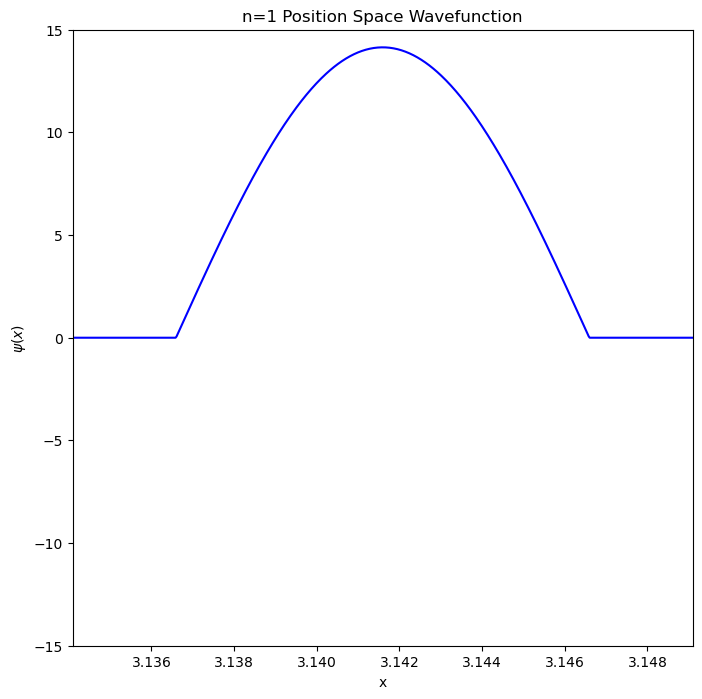

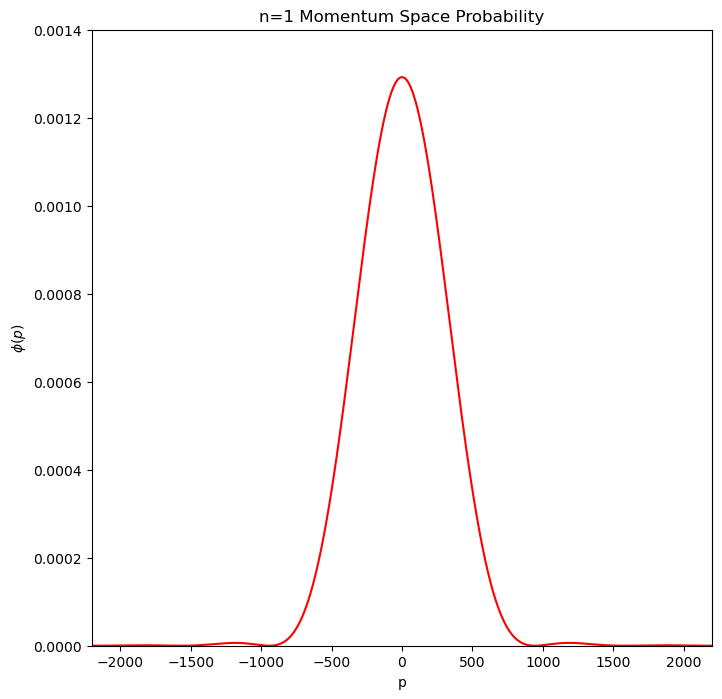

In [3]:
from math import pi
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches

power = 18
Npoints = 2**power 
delta=0.005
    
def psi1(x):
    result = np.zeros(len(x))
    for i in range(len(x)):
        if(x[i]< pi-delta or x[i] > pi+delta):
            result[i] = 0.0
        else :
            result[i]=np.sqrt(1/delta)*np.sin(pi*(x[i]-pi+delta)/(2*delta))
    return result


##############################
#Edit only between these lines

def psi2(x):
    result = np.zeros(len(x))
    for i in range(len(x)):
        if(x[i]< pi-delta or x[i] > pi+delta):
            result[i] = 0.0
        else :
            result[i]=np.sqrt(1/delta)*np.sin(2*pi*(x[i]-pi+delta)/(2*delta))
    return result

def psi5(x):
    result = np.zeros(len(x))
    for i in range(len(x)):
        if(x[i]< pi-delta or x[i] > pi+delta):
            result[i] = 0.0
        else :
            result[i]=np.sqrt(1/delta)*np.sin(5*pi*(x[i]-pi+delta)/(2*delta))
    return result

def psi10(x):
    result = np.zeros(len(x))
    for i in range(len(x)):
        if(x[i]< pi-delta or x[i] > pi+delta):
            result[i] = 0.0
        else :
            result[i]=np.sqrt(1/delta)*np.sin(10*pi*(x[i]-pi+delta)/(2*delta))
    return result

##############################
#Edit only between these lines



def modsq(x):
    result = np.zeros(len(x))
    for i in range(len(x)):
        result[i]=abs(x[i])*abs(x[i])
    return result

def mom(x):
    return (x-pi)*Npoints/(2*pi)

def generatedata(n,f):  
    dataxs = 2*pi*np.arange(n)/n  
    datays = f(dataxs)  
    return dataxs, datays  

def fft(ys): 
    n = ys.size  
    m = n//2  
    if n==1:  
        ytils = ys  
    else:  
        evens = fft(ys[::2])  
        odds = fft(ys[1::2])  
        coeffs = np.exp(-2*pi*np.arange(m)*1j/n)  
        first = evens + coeffs*odds  
        second = evens - coeffs*odds  
        ytils = np.concatenate((first, second))  
    return ytils  

def fftinterp(ytils,x):  
    n = ytils.size  
    m = n//2  
    val = ytils[:m]@np.exp(np.arange(m)*x*1j)  
    val += ytils[m]*np.cos(m*x)  
    val += ytils[m+1:]@np.exp(np.arange(-m+1,0)*x*1j)
    return val/n 

    
def simpsonintegration(intgd,a,b,n):  
    h = (b-a)/(n-1)  
    xs = a + np.arange(n)*h  
    cs = 2*np.ones(n)  
    cs[1::2] = 4; 
    cs[0] = 1; cs[-1] = 1  
    contribs = cs*intgd
    return (h/3)*np.sum(contribs)  
 
dataxs, datays = generatedata(Npoints, psi1) 
ytils = fft(datays)

integrand1=np.ones(Npoints)
integrand1p2=np.ones(Npoints)
for i in range(Npoints) :
    f=abs( ytils[i] ) 
    integrand1[i]=f*f

nrm1=1/np.sqrt(simpsonintegration(integrand1,mom(0),mom(2*pi),Npoints))
phi1=np.concatenate([nrm1*ytils[2**(power-1):2**power],nrm1*ytils[0:(2**(power-1))]])



# Configure matplotlib

plt.figure(figsize=(8, 8))
plt.xlim([pi-1.5*delta, pi+1.5*delta])
plt.ylim([-1.5/np.sqrt(2*delta), 1.5/np.sqrt(2*delta)])
plt.xlabel("x")
plt.ylabel("$\psi(x)$")
plt.title("n=1 Position Space Wavefunction")

# plot
plt.plot(dataxs, datays,'b')


plt.show()

plt.figure(figsize=(8, 8))
plt.xlim([-22/(2*delta), 22/(2*delta)])
plt.ylim([0.0, 0.14*2*delta])
plt.xlabel("p")
plt.ylabel("$\phi(p)$")
plt.title("n=1 Momentum Space Probability")

# plot
plt.plot(mom(dataxs), modsq(phi1),'r')


plt.show()



So we see for this case that it looks nothing like two delta functions! Note there are also a series of small bumps on either side.

Now lets try the first excited state with n=2.

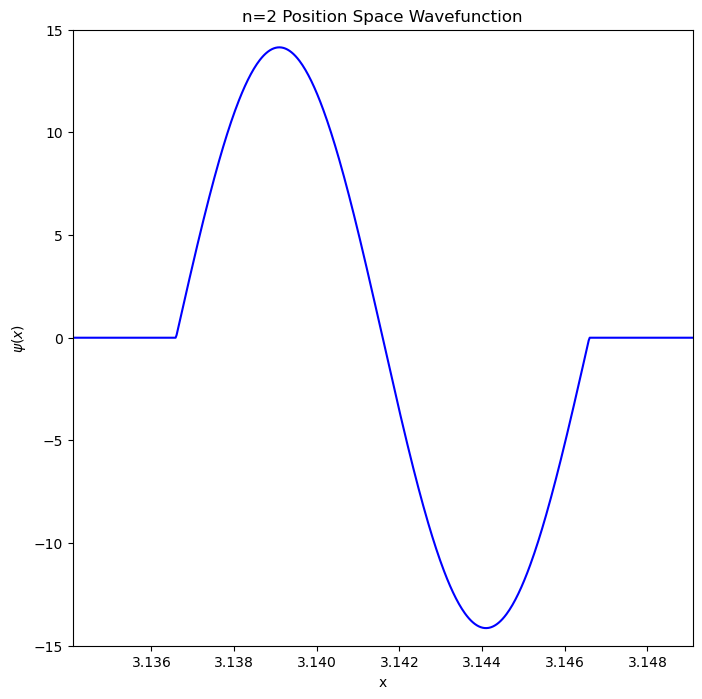

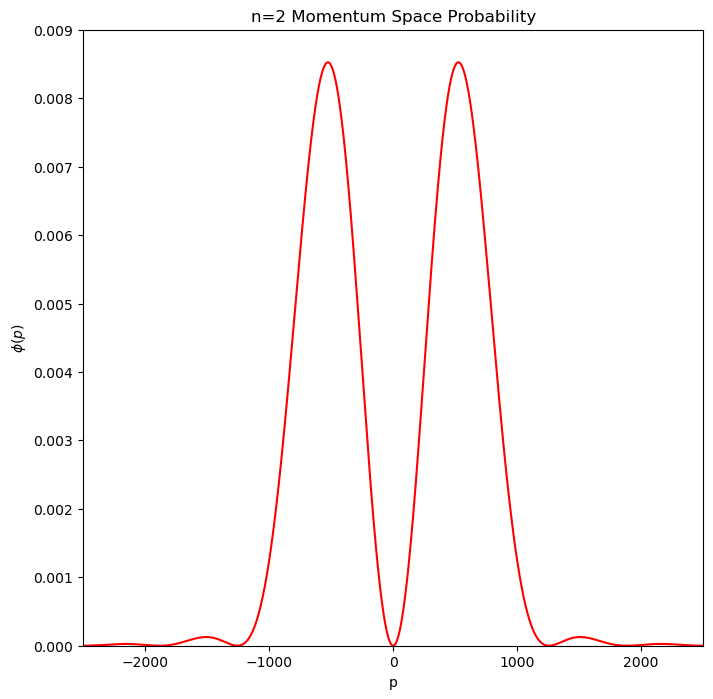

In [4]:
dataxs, datays = generatedata(Npoints, psi2) 
ytils = fft(datays)


integrand2=np.ones(Npoints)
for i in range(Npoints) :
    f=abs( ytils[i] ) 
    integrand2[i]=f*f
    
nrm2=pi/np.sqrt(simpsonintegration(integrand2,mom(0),mom(2*pi),Npoints))    
phi2=np.concatenate([nrm2*ytils[2**(power-1):2**power],nrm2*ytils[0:(2**(power-1))]])
    
# Configure matplotlib

plt.figure(figsize=(8, 8))
plt.xlim([pi-1.5*delta, pi+1.5*delta])
plt.ylim([-1.5/np.sqrt(2*delta), 1.5/np.sqrt(2*delta)])
plt.xlabel("x")
plt.ylabel("$\psi(x)$")
plt.title("n=2 Position Space Wavefunction")

# plot
plt.plot(dataxs, datays,'b')
plt.show()

plt.figure(figsize=(8, 8))
plt.xlim([-25/(2*delta), 25/(2*delta)])
plt.ylim([0,0.9*2*delta])
plt.xlabel("p")
plt.ylabel("$\phi(p)$")
plt.title("n=2 Momentum Space Probability")

# plot
plt.plot(mom(dataxs), modsq(phi2),'r')
plt.show()

Now we see two large peaks at $p=\pm 526$

Next lets do the fourth excited state with n=5.

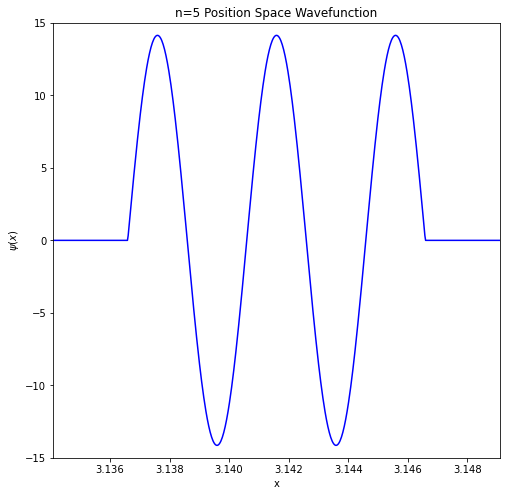

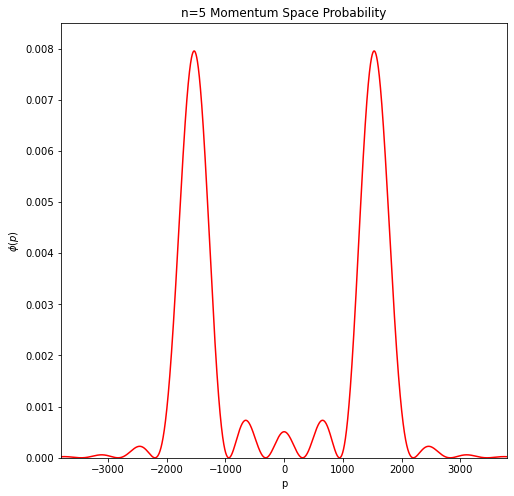

In [186]:
dataxs, datays = generatedata(Npoints, psi5) 
ytils = fft(datays)

integrand5=np.ones(Npoints)
integrand5p2=np.ones(Npoints)
for i in range(Npoints) :
    f=abs( ytils[i] ) 
    integrand5[i]=f*f

nrm5=pi/np.sqrt(simpsonintegration(integrand5,mom(0),mom(2*pi),Npoints))    
phi5=np.concatenate([nrm5*ytils[2**(power-1):2**power],nrm5*ytils[0:(2**(power-1))]])



# Configure matplotlib

plt.figure(figsize=(8, 8))
plt.xlim([pi-1.5*delta, pi+1.5*delta])
plt.ylim([-1.5/np.sqrt(2*delta), 1.5/np.sqrt(2*delta)])
plt.xlabel("x")
plt.ylabel("$\psi(x)$")
plt.title("n=5 Position Space Wavefunction")

# plot
plt.plot(dataxs, datays,'b')


plt.show()
plt.figure(figsize=(8, 8))
plt.xlim([-38/(2*delta), 38/(2*delta)])
plt.ylim([0, 0.85*2*delta])
plt.xlabel("p")
plt.ylabel("$\phi(p)$")
plt.title("n=5 Momentum Space Probability")

# plot
plt.plot(mom(dataxs), modsq(phi5),'r')


plt.show()

Again there are two large peaks, now at $p=\pm 1532$

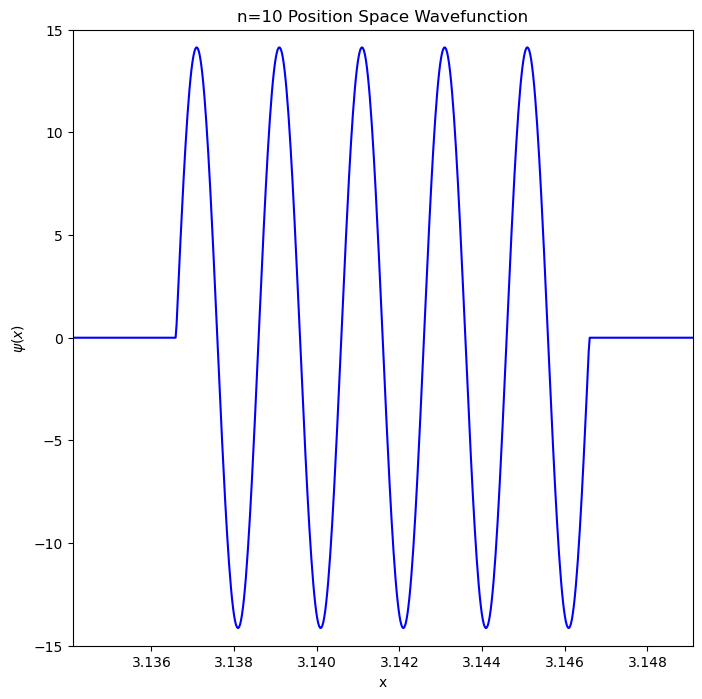

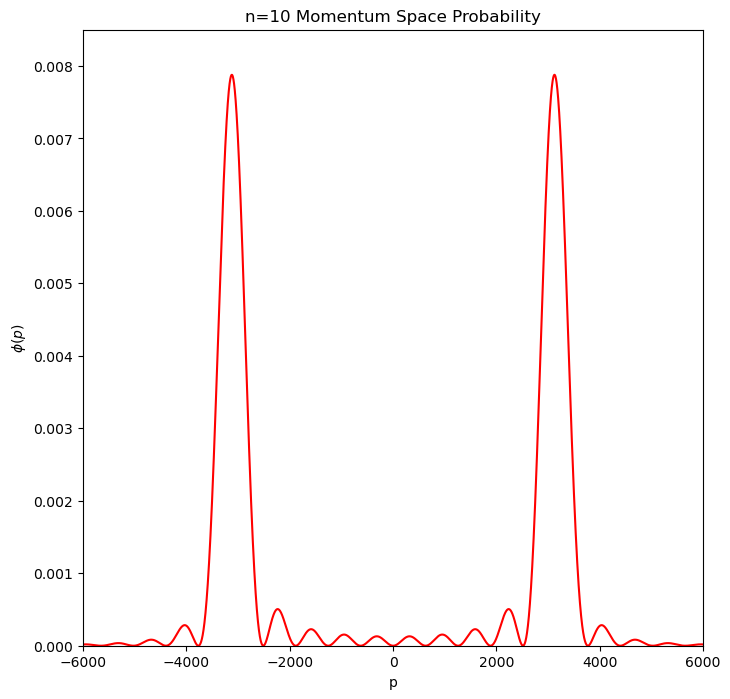

In [5]:
dataxs, datays = generatedata(Npoints, psi10) 
ytils = fft(datays)

integrand10=np.ones(Npoints)
integrand10p2=np.ones(Npoints)
for i in range(Npoints) :
    f=abs( ytils[i] ) 
    integrand10[i]=f*f

nrm10=pi/np.sqrt(simpsonintegration(integrand10,mom(0),mom(2*pi),Npoints))    
phi10=np.concatenate([nrm10*ytils[2**(power-1):2**power],nrm10*ytils[0:(2**(power-1))]])


# Configure matplotlib

plt.figure(figsize=(8, 8))
plt.xlim([pi-1.5*delta, pi+1.5*delta])
plt.ylim([-1.5/np.sqrt(2*delta), 1.5/np.sqrt(2*delta)])
plt.xlabel("x")
plt.ylabel("$\psi(x)$")
plt.title("n=10 Position Space Wavefunction")

# plot
plt.plot(dataxs, datays,'b')


plt.show()
plt.figure(figsize=(8, 8))
plt.xlim([-60/(2*delta) , 60/(2*delta) ])
plt.ylim([0, 0.85*2*delta])
plt.xlabel("p")
plt.ylabel("$\phi(p)$")
plt.title("n=10 Momentum Space Probability")

# plot
plt.plot(mom(dataxs), modsq(phi10),'r')


plt.show()

The peaks are now at $p=\pm$ 3122

Now lets calculate the expectation value of momentum squared. In momentum space we just need to integrate $p^2|\phi(p)|^2$.

In [7]:
from IPython.display import display, Math

integrand1p2=np.ones(Npoints)
integrand2p2=np.ones(Npoints)
integrand5p2=np.ones(Npoints)
integrand10p2=np.ones(Npoints)
for i in range(Npoints) :
    f1=abs( phi1[i] ) 
    f2=abs( phi2[i] ) 
    f5=abs( phi5[i] ) 
    f10=abs( phi10[i] ) 
    p=mom(dataxs[i])
    integrand1p2[i]=p*p*f1*f1
    integrand2p2[i]=p*p*f2*f2
    integrand5p2[i]=p*p*f5*f5
    integrand10p2[i]=p*p*f10*f10    
    
expect1=simpsonintegration(integrand1p2,mom(0),mom(2*pi),Npoints)
display(Math(r'n=1: \langle p^2 \rangle ={}'.format(round(expect1,1))))

expect2=simpsonintegration(integrand2p2,mom(0),mom(2*pi),Npoints)
display(Math(r'n=2: \langle p^2 \rangle ={}'.format(round(expect2,1))))

expect5=simpsonintegration(integrand5p2,mom(0),mom(2*pi),Npoints)
display(Math(r'n=5: \langle p^2 \rangle ={}'.format(round(expect5,1))))

expect10=simpsonintegration(integrand10p2,mom(0),mom(2*pi),Npoints)
display(Math(r'n=10: \langle p^2 \rangle ={}'.format(round(expect10,1))))

NameError: name 'phi5' is not defined

which (ideally) should agree with the analytic calculation:

$n=1$: $\langle p^2 \rangle = \frac{\pi^2}{a^2} = 98696.04 $<br>
$n=2$: $\langle p^2 \rangle = \frac{4\pi^2}{a^2} = 394784.18 $<br>
$n=5$: $\langle p^2 \rangle = \frac{25\pi^2}{a^2} = 2467401.10$<br>
$n=10$: $\langle p^2 \rangle = \frac{100\pi^2}{a^2} = 9869604.40 $<br>

We can see that the errors grow with $n$, so if we needed more than two digit accuracy for $n>2$ we would need to increase the number of grid points and/or use a well size that is even smaller.